# Description and Software Disclaimer

Title: NIST Adsorption Isotherm Database Column Simulator

Software Description: This notebook utilizes single-component isotherms in the NIST/ARPA-E Database of Novel Adsorbent Materials (https://adsorption.nist.gov/isodb) and Ideal Adsorbed Solution Theory to model an adsorption column, to estimate column breakthrough time.

Authors:  
Tom R. C. Van Assche, PhD  
Daniel W. Siderius, PhD

------------VERSION HISTORY---------------- 

2018-07-31: v 1.0 (initial release)


------------SOFTWARE DISCLAIMER AND REDISTRIBUTION CONDITIONS----------------

This software was developed at the National Institute of Standards and Technology by employees of the Federal Government in the course of their official duties. Pursuant to Title 17 Section 105 of the United States Code this software is not subject to copyright protection and is in the public domain. This software is an experimental system. NIST assumes no responsibility whatsoever for its use by other parties, and makes no guarantees, expressed or implied, about its quality, reliability, or any other characteristic. We would appreciate acknowledgement if the software is used.

This software can be redistributed and/or modified freely provided that any derivative works bear some notice that they are derived from it, and any modified versions bear some notice that they have been modified.

------------DECLARATION OF CONFLICTING INTERESTS----------------

Certain commercially available items may be identified in this paper. This identification does not imply recommendation by NIST, nor does it imply that it is the best available for the purposes described.

# User Guide

### Preface
The purpose of this notebook is to perform a crude simulation of a plug-flow adsorption column, which may be used to estimate the break-through time of various components in an inlet stream that is flowed through a column containing adsorbent that entrains some or all of the input components. The engineering approach and solution algorithm is based on work published by Tom Van Assche, Joeri Denayer, and Gino Baron of the Department of Chemical Engieering at Vrije Universiteit Brussel in Brussels, Belgium. The particular code used here is based on a rigid-adsorbent version of the algorithm disclosed in:

Van Assche, T.R.C., Baron, G., Denayer, J.F.M., Molecular separations with breathing metal-organic frameworks: modelling packed bed adsorbers, Dalton Trans., 2016, 45, pp. 4416-4430. (https://dx.doi.org/10.1039/C6DT00258G)

For full discussion of the approach and algorithm, please consult the reference above. A short summary and list of assumptions is as follows:
1. Gas flows through the column at fixed velocity; this implies an excess of inert (non-adsorbing) carrier.
2. No pressure drop in the column is considered.
3. The column is operated isothermally (hence, no heat balance).
4. The column is assumed to be plug-flow, hence there is no radial variation in the composition. As a result, the column cross-sectional area is unimportant and is undefined here.
5. This approach ignores mass-transfer and adsorption kinetics; at each time and column position the approach imposes instantaneous thermodynamic equilibrium (equivalent to infinitely fast kinetics) between the mobile (gas) phase and the stationary (adsorbed) phase.

### Multicomponent Adsorption Thermodynamics

This column simulator uses "Ideal Adsorbed Solution Theory" (IAST) to model multicomponent adsorption equilibrium. Additionally, it uses the pyIASTpackage to apply IAST. End-users should consult the pyIAST documentation (https://github.com/CorySimon/pyIAST, http://pyiast.readthedocs.io/en/latest/) to understand its syntax and warning codes. A Python implementation of IAST in conjunction with the NIST Adsorption Isotherm (NIST-ISODB) is provided at https://github.com/dwsideriusNIST/adsorption_tools/blob/master/NIST-ISODB_IAST.ipynb

As of 2017-07-31, pyIAST requires Python 3.x. The end user is responsible for installing Python 3.x and then confirming that pyIAST is loaded properly. Also, since it is not possible to automatically select an isotherm model for fitting an experimental isotherm; the end user must ensure that the selected model or isotherm fit adequately represents the input isotherm data. The different isotherm models available in pyIAST may be accessed by running 

pyiast._MODELS

### Usage
This notebook is intended as an example of how to simulate an adsorption column in which the multicomponent adsorption equilibrium is determined via IAST and for which the single-component isotherms are provided by the NIST-ISODB application programming interface (API); actual use may require extensive modification of the Python code that follows as certain assumptions have been built-in to the code, though those assumptions will be pointed out. Use of this notebook follows the general sequence that follows, with each element corresponding to a major heading of the notebook below:
1. Import Required Python Packages
   This step simply imports the supporting packages required by the notebook
   
2. Define Custom Class and Import Custom Package
   This step:

    - defines a custom class that is used to abstract the isotherm data from the NIST-ISODB API
    - imports a custom package that provides the function that solves the non-linear mass balance equation


3. User Selection of Pure-Component Isotherms
   In this step, the user must identify the single-component isotherms that will be used for IAST. The input isotherms must be single-component, or the isotherm instantiation step will fail via a Python exception. 
   
4. Instantiate Isotherms and Conduct Basic Error Checks
   This step create the isotherm objects based on the class definition in Step 2, and then performs basic tests to ensure thermodynamic consistency needed for the IAST calculations.

5. Common pyIAST Operations
   This step creates the Pandas dataframe objects based on the single-component isotherms defined in Step 3 and imported in Step 4.
 
6. Set Relevant Thermophysical Constants
   This step defines the universal gas constant, identifies the temperature (from the input isotherms), and pre-calculates "RT" to save computations later. Additionally, this block is where unit conversions would be defined. The default units for the simulator are:  
   Temperature: Kelvin  
   Pressure: bar  
   Volume: meters^3 (m^3)  
   Mass: kg
   Adsorption Isotherms: mol/kg  (identical to mmol/g)  
   Density: kg/m^3  
   Porosity: Dimensionless  
   Time: seconds  
   
7. Column Initialization
   This step sets the essential parameters of the column, including the adsorbent density, the (external) sorbent porosity, the inlet partial pressures, initial partial pressures, the column length, interstitial velocity, number of time steps, and number of divisions (axial slices) of the column.
   
8. Simulate the Plug-flow Adsorption Column
   This steps simulates the adsorption column, by first initializing the data structures that will store both the instantaneous partial pressure of the mobile phase and the adsorbed amounts in the stationary phase at each time and axial position. At each time and position, a set of mass balance equations is imposed, which is solved via the "solverloading" function provided by NISTPFR.py; this function, in turn, uses a non-linear solver function provided by the SciPy package.
   
9. Plot Partial Pressures at exit, and as function of time and position
   This block simply displays 1) the outlet partial pressures and 2) partial pressure as a function of time and position for each component.

### Warnings
1. This notebook conducts some basic checks:
   <br>1) Compatible pressure units across the source single-component isotherms
   <br>2) Compatible adsorption units across the source single-component isotherms
   <br>3) Same adsorbent across the source single-component isotherms
   <br>4) Ensuring that the composition list matches the number of source isotherms
   <br>5) Ensuring that the source isotherms are single-component
 
   These checks can, of course, be overridden. IAST may, then, yield nonsensical results.

2. Units of input isotherms can be modified to be compatible. An end user is responsible for writing the code to make those conversions.

3. In principle, IAST can operate on any set of single-component adsorption isotherms measured at the same temperature; it does not check whether the adsorbent material is consistent between those source isotherms. Therefore, a user could apply IAST to single-component isotherms from different materials.


### Acknowledgments

NIST thanks Tom Van Assche, PhD, of Vrije Universiteit Brussel in Brussels, Belgium, for providing a MATLAB code that served as the example of this Python code.

## 1. Import Python Packages

In [1]:
#NOTE: This tool uses the pyIAST package, which requires Python 3.x.
#End User is responsible for installation of missing packages using an appropriate Python package manager

%matplotlib inline
import os
import copy
import itertools
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import pyiast

#Uncomment the following lines to suppress warnings
#import warnings ; warnings.filterwarnings('ignore')

## 2. Import Custom Class and Package

In [2]:
# Custom Packages
from NISTISODB import *
from NISTPFR import *

## 3. User Selection of Pure-Component Isotherms

In [3]:
#Instructions:
#1. Select pure-component isotherms from NIST-ISODB, by their filename(s), defined as string variables.
#2. Assemble the pure-component isotherm string variables into a list named "isotherm_files"
#3. Specify the Isotherm Fitting Models (available models listed via the "pyiast._MODELS" command) for the
#   pure-component isotherms in a list named "models"

#Select the Isotherm Files
isotherm1 = '10.1002chem.200902144.Isotherm4.json' #CH4 on ZIF-8 @ 303K http://dx.doi.org/10.1002/chem.200902144
isotherm2 = '10.1002chem.200902144.Isotherm5.json' #CO2 on ZIF-8 @ 303K http://dx.doi.org/10.1002/chem.200902144
isotherm3 = '10.1002chem.200902144.Isotherm6.json' #N2  on ZIF-8 @ 303K http://dx.doi.org/10.1002/chem.200902144

#Assemble the isotherm filenames into a list
isotherm_files = [ isotherm1, isotherm2, isotherm3 ]
#isotherm_files = [ isotherm1, isotherm2 ]
#isotherm_files = [ isotherm1, isotherm3 ]

#Specify the Isotherm Fitting Models (Langmuir,)
model1 = "Langmuir"
model2 = "Langmuir"
model3 = "Langmuir"
models = [model1, model2, model3]
#models = [model1, model2]
#models = [model1, model3]

## 4. Instantiate Isotherms and Conduct Basic Error Checks

In [4]:
#Instructions: This block of code should not be altered unless a user is
# overriding an error check

#Instantiate the pure-component isotherms
isotherms = [ NIST_ISODB_isotherm(file) for file in isotherm_files ]
num_species = len(isotherms)
spec_pairs = list(itertools.combinations(range(num_species), 2))

#Actual Error Check
error_check_isotherms(isotherms)

ESSENTIAL SYSTEM CHECKS: 
Pressure units are compatible: bar
Adsorption units are compatible: mmol/g
Same material is specified: ZIF-8
Temperature is consistent: 303.0


## 5. Common pyIAST Operations

10.1002chem.200902144.Isotherm4.json
Methane adsorption on ZIF-8


/home/local/NIST/dsideriu/anaconda3/lib/python3.6/site-packages/pyiast/isotherms.py:60: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  idx_min = df_nonzero[loading_key].argmin()


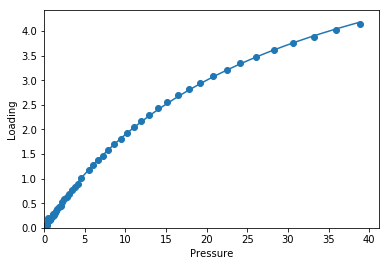

10.1002chem.200902144.Isotherm5.json
Carbon Dioxide adsorption on ZIF-8


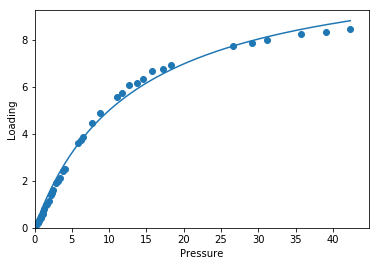

10.1002chem.200902144.Isotherm6.json
Nitrogen adsorption on ZIF-8


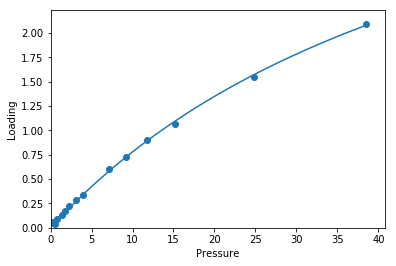

In [5]:
#Instructions: User must choose an isotherm model or select an interpolation option

#List Models:
#pyiast._MODELS

#Compose dataframes from the single-component isotherm data; generate models in pyIAST and plot the data/fits
Spec_Isotherms = []
for isotherm,model in zip(isotherms,models):
    #Option 1: Fit the single-component isotherms to the model(s) specified previously.
    Spec_Isotherms.append(
        pyiast.ModelIsotherm(
            pd.DataFrame({ isotherm.p_label: isotherm.p_list, isotherm.ads_label: isotherm.ads_list }),
            loading_key=isotherm.ads_label,
            pressure_key=isotherm.p_label,
            model=model)
        )
    #Option 2: Interpolate the single-component isotherm
    #Spec_Isotherms.append(
    #    pyiast.InterpolatorIsotherm(
    #        pd.DataFrame({ isotherm.p_label: isotherm.p_list, isotherm.ads_label: isotherm.ads_list }),
    #        loading_key=isotherm.ads_label,
    #        pressure_key=isotherm.p_label)
    #    )
    print(isotherm.filename)
    print(isotherm.adsorbate["name"]+' adsorption on '+isotherm.adsorbent["name"])
    pyiast.plot_isotherm(Spec_Isotherms[-1],withfit=True,
                         xlogscale=False)

## 6. Set Relevant Thermophysical Constants

In [6]:
# Constants
#   NOTE: NIST-ISODB uses bar as native units for pressure
#Rg = 8.31415 #J/mol K  = kPa l/mol K
Rg = 8.31415e-5 #bar m^3/mol K
T = isotherms[0].temperature #This assumes that the same temperature is in all isotherms
RT = Rg*T


#   NOTE: The user is responsible for ensuring that the units of Rg, sorbent density, and
#       the selected isotherms are compatible. This clode block is based on a 'default'
#       set of units (bar for pressure, m^3 for volume, mol/kg for adsorption, and kg/m3 for density)

## 7. Column Initialization

In [32]:
print(' * * * * * PASSING BREAKTHROUGH COLUMN  * * * * *')
print(' ____________________________________________________');
print(' ');
print(' based on original MATLAB code written by Tom Van Assche, 2014, Department of Chemical Engineering, VUB');
print(' ');

print(' ');
print(' *** CONFIRMING INPUT: please verify');
print(' ');

#  Adsorbent Mechanical Properties
dens = 350.  # adsorbent density (in kg/m3)
eps = 0.5  # porosity (all external to adsorbent phase)

#  Adsorbate Partial Pressures
#   Feed Composition
p_feed = [1.5,1.5,0.5]
#p_feed = [1.5,1.5]
#   Initial Column Conditions
p_initial = [0.1, 0.1,0.1]
#p_initial = [0.1, 0.1]

#  Physical Parameters
xs=30    # number of cells in the column (determines size of x positions). 
L_col=0.2 # [m] column length
velocity_inter=0.1 # [m/s] interstitial velocity (depends on porosity and superficial velocity!)
t_final = 30.  # [s] simulation time

#  Calculations
d_x=L_col/(xs)
d_t=d_x/velocity_inter
ts = int(t_final/d_t)
eqs=xs*ts;

#Parameter Output
print(' dx is (m): '+repr(d_x))
print(' dt is (s): '+repr(d_t))
print()
print(' column length  (m)                       : '+repr(L_col))
print(' interstital velocity (m/s)               : '+repr(velocity_inter))
print(' final simulation time (s)                : '+repr(t_final))
print()

print(' Porosity                                 : ', repr(eps))
print();
for (i,x) in enumerate(p_initial):
    print(' p init COMP.'+str(i+1)+'                            : ', repr(x))
print();
for (i,x) in enumerate(p_feed):
    print(' p feed COMP.'+str(i+1)+'                            : ', repr(x))
print();
print(' X positions                              : ', repr(xs))
print(' Passing moves (time)                     : ', repr(ts))
print(' Number of Points                         : ', repr(eqs))
print(' _________________________________________________________');

 * * * * * PASSING BREAKTHROUGH COLUMN  * * * * *
 ____________________________________________________
 
 based on original MATLAB code written by Tom Van Assche, 2014, Department of Chemical Engineering, VUB
 
 
 *** CONFIRMING INPUT: please verify
 
 dx is (m): 0.006666666666666667
 dt is (s): 0.06666666666666667

 column length  (m)                       : 0.2
 interstital velocity (m/s)               : 0.1
 final simulation time (s)                : 30.0

 Porosity                                 :  0.5

 p init COMP.1                            :  0.1
 p init COMP.2                            :  0.1
 p init COMP.3                            :  0.1

 p feed COMP.1                            :  1.5
 p feed COMP.2                            :  1.5
 p feed COMP.3                            :  0.5

 X positions                              :  30
 Passing moves (time)                     :  450
 Number of Points                         :  13500
 ________________________________________

## 8. Simulate the Plug-flow Adsorption Column

In [33]:
#Initialization of the Grids
print(' *** INITIALIZING')

# initial concentration / adsorption
p = [ [ p_initial for i in range(xs) ]  for j in range(ts) ]

# initial adsorbed amounts
ads_init = list(pyiast.iast(p_initial,Spec_Isotherms,verboseflag=False,warningoff=True))
q = [[ads_init for i in range(xs)] for j in range(ts)]

print(' ');
print(' *** CALCULATING'); # - - - - - - - - - - - - - - - - - - -
print(' ');

for j in tqdm_notebook(range(1,ts), desc='Progress:'):
    #every gas cell is moved one forward for next timestep
    p[j][1:] = p[j-1][:-1]
    #every adsorbed part cell remains at position for next timestep
    q[j] = q[j-1]
    #Boundary Conditions
    p[j][0] = p_feed
   
    for i in range(xs):  #Secondary Loop: X-positions
        # Compute the total mass in the segment
        N_total = [ (p[j][i][k]/RT)*eps + q[j][i][k]*(1.-eps)*dens for k in range(num_species) ]
    
        #Check for stability (don't try to equilibrate negative moles)
        if sum(N_total) <= 0.:
            p_new = [ 0. for k in range(num_species) ]
            q_new = [ 0. for k in range(num_species) ]
            print(' Total moles present: negative --> set to zero')
        else:
            #Calculate equilibrium conditions
            guess = p[j-1][i] # use current partial pressure to seed the non-linear solver

            #Mass Balance
            p_new = solverloading(N_total,RT,eps,dens,Spec_Isotherms,guess,1.e-8)
            
            #IAST Calculation
            q_new = list(pyiast.iast(p_new,Spec_Isotherms,verboseflag=False,warningoff=True))
                
            # Basic Error checks
            for k in range(num_species):
                if p_new[k] < 0.:
                    if p_new[k] < -1.e-5:
                        p_new[i] = 0.
                    else:
                        print(' NOTE !!!: P NEGATIVE         row ', j, ' column ', i, ' ... P is ', p_new[k])
            
        #Save the solution
        p[j][i] = p_new
        q[j][i] = q_new
         
        #print(j,i)    
    #End of X-Loop
    #break
#End of Time-Loop
print(' *** DONE')

 *** INITIALIZING
 
 *** CALCULATING
 


 *** DONE


## 9. Plot Partial Pressures at exit, and as function of time and position

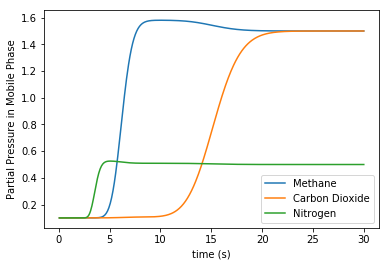

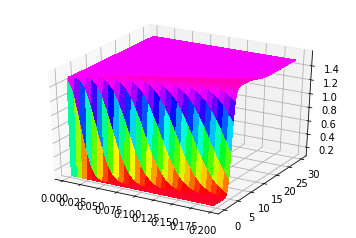

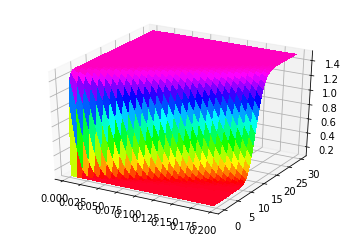

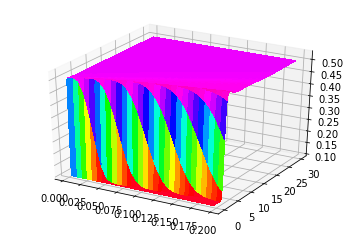

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Plot the outlet concentrations as a function of time
fig = plt.figure()
for i in range(num_species):
    plt.plot([float(j+1)*d_t for j in range(ts)],[x[xs-1][i] for x in p],'-',label=isotherms[i].adsorbate["name"])
x1,x2,y1,y2 = plt.axis()
#plt.axis((0,10,0,1.5))
plt.xlabel('time (s)')
plt.ylabel('Partial Pressure in Mobile Phase')
plt.legend()
plt.show()

#Create 2-D grids to simplify 3D plots
posL = []
for i in range(xs):
    posL.append(float(i+1)*d_x - d_x/2.)
posL = np.array(posL)
time = []
for j in range(ts):
    time.append(float(j)*d_t)
time = np.array(time)
posL, time = np.meshgrid(posL,time)

#
for i in range(num_species):
    Z = np.array([ [ x[i] for x in y ] for y in p ])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(posL,time, Z, cmap = cm.gist_rainbow,
                       linewidth=0, antialiased=False)
    plt.show()

In [10]:
# Output the outlet partial pressures
for j in range(ts):
    #print(j+1,p[j][-1][0])
    print((j+1)*d_t,p[j][-1][:])

0.06666666666666667 [0.1, 0.1, 0.1]
0.13333333333333333 [0.1 0.1 0.1]
0.2 [0.1 0.1 0.1]
0.26666666666666666 [0.1 0.1 0.1]
0.3333333333333333 [0.1 0.1 0.1]
0.4 [0.1 0.1 0.1]
0.4666666666666667 [0.1 0.1 0.1]
0.5333333333333333 [0.1 0.1 0.1]
0.6 [0.1 0.1 0.1]
0.6666666666666666 [0.1 0.1 0.1]
0.7333333333333333 [0.1 0.1 0.1]
0.8 [0.1 0.1 0.1]
0.8666666666666667 [0.1 0.1 0.1]
0.9333333333333333 [0.1 0.1 0.1]
1.0 [0.1 0.1 0.1]
1.0666666666666667 [0.1 0.1 0.1]
1.1333333333333333 [0.1 0.1 0.1]
1.2 [0.1 0.1 0.1]
1.2666666666666666 [0.1 0.1 0.1]
1.3333333333333333 [0.1 0.1 0.1]
1.4 [0.1 0.1 0.1]
1.4666666666666666 [0.1 0.1 0.1]
1.5333333333333332 [0.1 0.1 0.1]
1.6 [0.1 0.1 0.1]
1.6666666666666667 [0.1 0.1 0.1]
1.7333333333333334 [0.1 0.1 0.1]
1.8 [0.1 0.1 0.1]
1.8666666666666667 [0.1 0.1 0.1]
1.9333333333333333 [0.1 0.1 0.1]
2.0 [0.1 0.1 0.1]
2.0666666666666664 [0.1        0.1        0.10000001]
2.1333333333333333 [0.1        0.1        0.10000014]
2.2 [0.1        0.1        0.10000103]
2.266666